In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tt
from tqdm.notebook import tqdm

In [3]:
def gauss_func(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2) 

In [4]:
def integral(func, mu, sigma, start_point, end_point, n_samples):
    step = (end_point - start_point) / n_samples
    result = [0]
    for i in range(1, n_samples):
        result.append(result[i - 1] + func(start_point + step / 2, mu, sigma) * step)
        start_point += step
    return result 

## Let's try to get high accuracy

In [5]:
START_POINT = -2**10
END_POINT = 2**10
SAMPLES_NUMBER = int((END_POINT - START_POINT) / 0.01)

In [6]:
mu_sig = [[0,1], [0, 5], [5, 2]]
COLORS = ['red', 'blue', 'green']

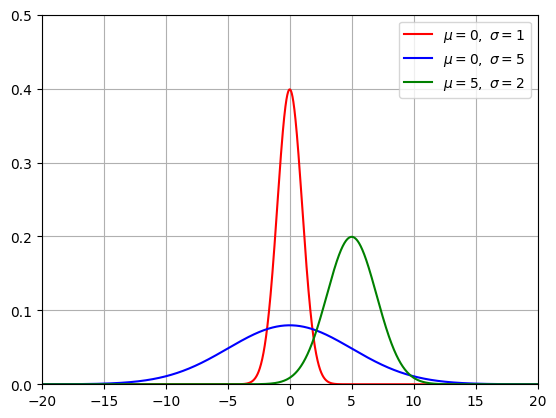

In [7]:
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = gauss_func(X, mu_sig[i][0], mu_sig[i][1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 0.5])
plt.grid()
plt.legend()
plt.show()

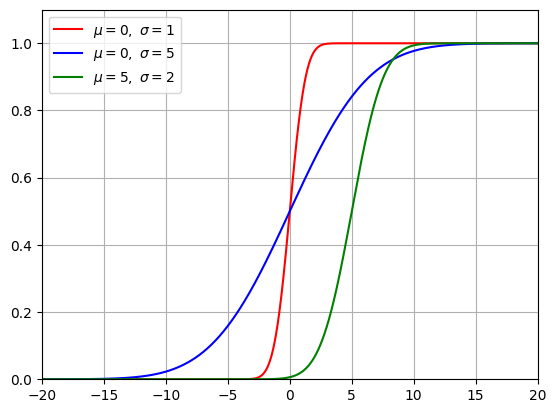

In [8]:
last_points = []
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = integral(gauss_func, mu_sig[i][0], mu_sig[i][1], START_POINT, END_POINT, SAMPLES_NUMBER)
    last_points.append(Y[-1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [9]:
last_points

[1.0, 1.0000000000000109, 1.0000000000000184]

### Results
So as we know function probability must be equal to 1 in +infinity and we got really close results.


## Let's take lower bounds

In [10]:
START_POINT = -100
END_POINT = 100
SAMPLES_NUMBER = int((END_POINT - START_POINT) / 0.01)

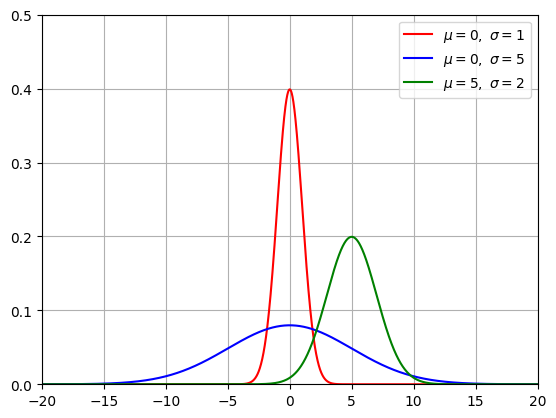

In [11]:
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = gauss_func(X, mu_sig[i][0], mu_sig[i][1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 0.5])
plt.grid()
plt.legend()
plt.show()

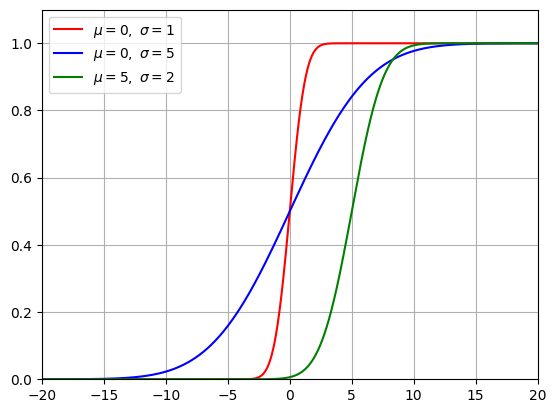

In [12]:
last_points = []
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = integral(gauss_func, mu_sig[i][0], mu_sig[i][1], START_POINT, END_POINT, SAMPLES_NUMBER)
    last_points.append(Y[-1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [13]:
last_points

[1.0, 1.0000000000000107, 1.000000000000021]

### Results
So as we can see according exactly to gaussian it doesn't demand huge bounds to get high accuracy in integral, due to exponential growth. 

## Let's take lower number of samples

In [14]:
START_POINT = -100
END_POINT = 100
SAMPLES_NUMBER = int((END_POINT - START_POINT) / 1)

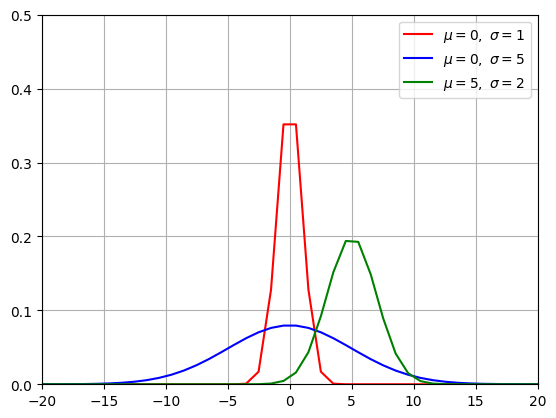

In [15]:
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = gauss_func(X, mu_sig[i][0], mu_sig[i][1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 0.5])
plt.grid()
plt.legend()
plt.show()

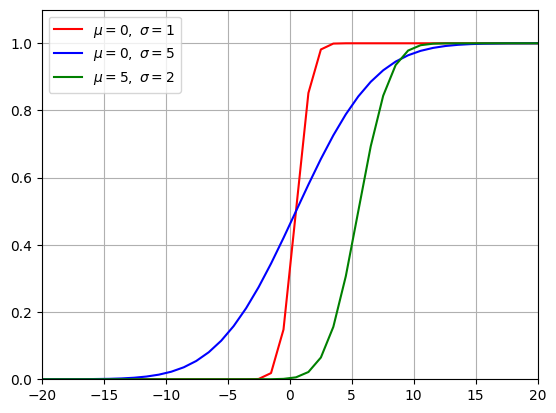

In [16]:
last_points = []
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = integral(gauss_func, mu_sig[i][0], mu_sig[i][1], START_POINT, END_POINT, SAMPLES_NUMBER)
    last_points.append(Y[-1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [17]:
last_points

[0.9999999946494242, 1.0, 1.0]

### Results
Even with step=1 we get pretty high accuracy, again due to exponential growth of gaussian.

## Dependency between the accuracy and the step

We will take the integral from -1 to 1, for example, and get the difference between the result with the low step (=0,01) and the current step

In [46]:
def integral(func, mu, sigma, start_point, end_point, step):
    n_samples = int((end_point - start_point) / step)
    result = 0
    for i in range(1, n_samples):
        #print(result)
        result+= func(start_point + step / 2, mu, sigma) * step
        start_point += step
    return result 

In [70]:
STEPS = np.linspace(0.01, 2, 1000)
START_POINT = -2
END_POINT = 2
INFINITY = - 2**10
# RIGHT_ANS = integral(gauss_func, 0, 1, INFINITY, END_POINT, 0.01) \
#              - integral(gauss_func, 0, 1, INFINITY, START_POINT,  0.01)
RIGHT_ANS = integral(gauss_func, 0, 1, START_POINT, END_POINT, 0.01)
RIGHT_ANS


0.953955306919637

[0.0, 0.000480630177218333, 0.00025168327917513, 0.0006664410695983447, 0.001068930662037948, 0.0010047530063059806, 0.000931523482975094, 0.0008515839639409162, 0.0012218588344100612, 0.0013610752792704295, 0.0023191545749180476, 0.0018651797784444701, 0.003321727410499631, 0.0023680706622337677, 0.002861104153847549, 0.002391576482964397, 0.0031254376658740313, 0.002410013436988545, 0.0026573391019596437, 0.0038907966625131296, 0.0030334660502380206, 0.0029174678045694735, 0.0035347516904717935, 0.004928758154044588, 0.0034195767167646274, 0.006251481330342257, 0.005854957662194349, 0.005990538857551075, 0.006664460812761064, 0.003432486669378232, 0.004948163275287576, 0.007078857932029448, 0.004821634332810354, 0.00791303377092445, 0.006267744795917629, 0.004951959512915272, 0.009488919061277579, 0.00876511764137089, 0.008336905820981122, 0.00819477799975088, 0.008335614854960705, 0.008762601995902952, 0.009485314250238464, 0.010519966368234046, 0.011889832187313987, 0.0062593403018

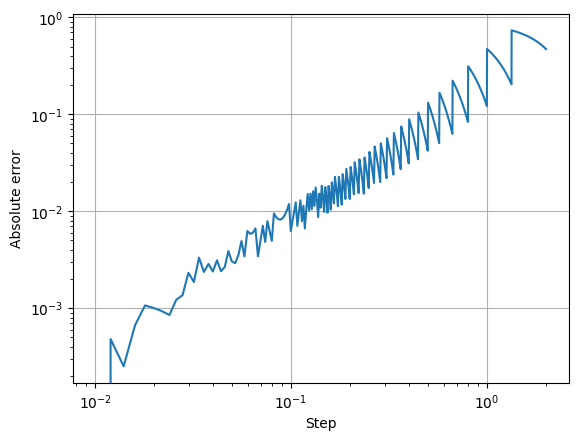

In [75]:
Y = []
for step in STEPS:
    current = integral(gauss_func, 0, 1, START_POINT, END_POINT, step)
    Y.append(abs(current - RIGHT_ANS))
print(Y)
plt.loglog(STEPS, Y)
#plt.axis([-20, 20, 0, 1.1])
plt.ylabel('Absolute error')
plt.xlabel('Step')
plt.grid()
plt.show()

## N-dimensional Gaussian distribution

In [5]:
def func(x, mu, cov_matrix):
    n = x.shape[0]
    return 1 / ((2 * np.pi)**(n/2) * (np.linalg.det(cov_matrix))**(1/2)) * \
    np.exp(-0.5 * (x - mu).T @ cov_matrix @ (x - mu))

In [27]:
d = 5
MU = np.zeros(d)
COV_MATRIX = np.eye(d)
X = np.array([0, 0, 0, 0, 0])
func(X, MU, COV_MATRIX)

0.010105326013811642

In [32]:
import copy
def integral(func, mu, cov_matrix, start_point, end_point, step):
    samples_number = np.prod((end_point - start_point) / step)
    area = ((end_point - start_point) / step).astype(int)
    print(area)
    current_point = copy.deepcopy(start_point).astype(float)
    #print(area)
    res = 0
    for i0 in tqdm(range(area[0])):
        current_point[1] = start_point[1]
        for i1 in range(area[1]):
            current_point[2] = start_point[2]
            for i2 in range(area[2]):
                current_point[3] = start_point[3]
                for i3 in range(area[3]):
                    current_point[4] = start_point[4]
                    for i4 in range(area[4]):
                        # print(current_point + np.array([step / 2] * 5), func(current_point + np.array([step / 2] * d), mu, cov_matrix), res)
                        res += (func(current_point + np.array([step / 2] * d), mu, cov_matrix) * (step**5))
                        current_point[4] += step
                        #print(current_point, step)
                    current_point[3] += step
                current_point[2] += step
            current_point[1] += step
        current_point[0] += step
    return res


In [10]:
def id_func(x, mu, cov_matrix):
    return 1

In [36]:
d = 5
START_POINT = np.array([-5] * 5)
END_POINT = np.array([5] * 5)
STEPS = np.linspace(0.5, 5, 100)
STEP = 1
MU = np.zeros(d)
COV_MATRIX = np.eye(d)



In [33]:
result = integral(func, MU, COV_MATRIX, START_POINT, END_POINT, 0.5)
result

[20 20 20 20 20]


  0%|          | 0/20 [00:00<?, ?it/s]

0.9999977969746555

In [37]:
Y = []
RIGHT_ANS = result
for step in tqdm(STEPS):
    current = integral(func, MU, COV_MATRIX, START_POINT, END_POINT, step)
    Y.append(abs(current - RIGHT_ANS))
    #print(abs(current - RIGHT_ANS))


  0%|          | 0/100 [00:00<?, ?it/s]

[20 20 20 20 20]


  0%|          | 0/20 [00:00<?, ?it/s]

[18 18 18 18 18]


  0%|          | 0/18 [00:00<?, ?it/s]

[16 16 16 16 16]


  0%|          | 0/16 [00:00<?, ?it/s]

[15 15 15 15 15]


  0%|          | 0/15 [00:00<?, ?it/s]

[14 14 14 14 14]


  0%|          | 0/14 [00:00<?, ?it/s]

[13 13 13 13 13]


  0%|          | 0/13 [00:00<?, ?it/s]

[12 12 12 12 12]


  0%|          | 0/12 [00:00<?, ?it/s]

[12 12 12 12 12]


  0%|          | 0/12 [00:00<?, ?it/s]

[11 11 11 11 11]


  0%|          | 0/11 [00:00<?, ?it/s]

[10 10 10 10 10]


  0%|          | 0/10 [00:00<?, ?it/s]

[10 10 10 10 10]


  0%|          | 0/10 [00:00<?, ?it/s]

[10 10 10 10 10]


  0%|          | 0/10 [00:00<?, ?it/s]

[9 9 9 9 9]


  0%|          | 0/9 [00:00<?, ?it/s]

[9 9 9 9 9]


  0%|          | 0/9 [00:00<?, ?it/s]

[8 8 8 8 8]


  0%|          | 0/8 [00:00<?, ?it/s]

[8 8 8 8 8]


  0%|          | 0/8 [00:00<?, ?it/s]

[8 8 8 8 8]


  0%|          | 0/8 [00:00<?, ?it/s]

[7 7 7 7 7]


  0%|          | 0/7 [00:00<?, ?it/s]

[7 7 7 7 7]


  0%|          | 0/7 [00:00<?, ?it/s]

[7 7 7 7 7]


  0%|          | 0/7 [00:00<?, ?it/s]

[7 7 7 7 7]


  0%|          | 0/7 [00:00<?, ?it/s]

[6 6 6 6 6]


  0%|          | 0/6 [00:00<?, ?it/s]

[6 6 6 6 6]


  0%|          | 0/6 [00:00<?, ?it/s]

[6 6 6 6 6]


  0%|          | 0/6 [00:00<?, ?it/s]

[6 6 6 6 6]


  0%|          | 0/6 [00:00<?, ?it/s]

[6 6 6 6 6]


  0%|          | 0/6 [00:00<?, ?it/s]

[5 5 5 5 5]


  0%|          | 0/5 [00:00<?, ?it/s]

[5 5 5 5 5]


  0%|          | 0/5 [00:00<?, ?it/s]

[5 5 5 5 5]


  0%|          | 0/5 [00:00<?, ?it/s]

[5 5 5 5 5]


  0%|          | 0/5 [00:00<?, ?it/s]

[5 5 5 5 5]


  0%|          | 0/5 [00:00<?, ?it/s]

[5 5 5 5 5]


  0%|          | 0/5 [00:00<?, ?it/s]

[5 5 5 5 5]


  0%|          | 0/5 [00:00<?, ?it/s]

[5 5 5 5 5]


  0%|          | 0/5 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[4 4 4 4 4]


  0%|          | 0/4 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[3 3 3 3 3]


  0%|          | 0/3 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

[2 2 2 2 2]


  0%|          | 0/2 [00:00<?, ?it/s]

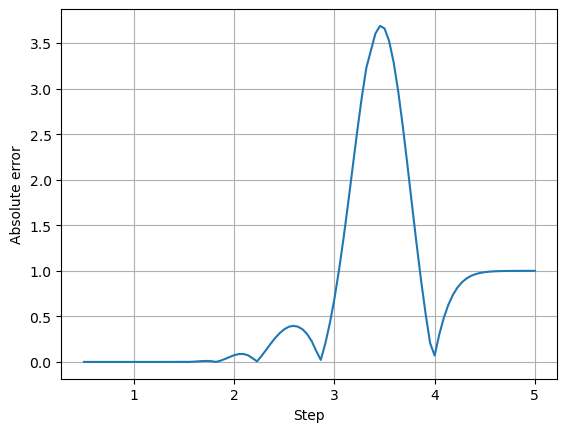

In [38]:
plt.plot(STEPS, Y)
#plt.axis([-20, 20, 0, 1.1])
plt.ylabel('Absolute error')
plt.xlabel('Step')
plt.grid()
plt.show()

### Results:
1. It's really time and memory demanding to get the result with step lower than 0.5 on area 10^5 (takes 1 min), that is why to get high accuracy in multi-dimnension case using this method we need very powerful computer.
2. Due exponential growth, actually, we get pretty nice result, however, for another function the situation could be different.
3. It's practically impossible to find integral with high accuracy on huge area because it's really time demanding.
4. The result depends on whether the side of rectangle multiple to step or not, that bad.

To sum up, this method is not good at all because of time and memory demand. That's why we need another method to use.

## Getting the integrall using TT-CROSS

In [39]:
import tt
import numpy as np
from tt.cross import rect_cross

In [40]:
def sample(ind, mu, cov_matrix, start_point, step):
    N = ind.shape[0]
    d = ind.shape[1]
    f = np.zeros(N)
    for i in range(N):
        x = start_point + ind[i, :] * step
        f[i] = 1 / ((2 * np.pi)**(d/2) * (np.linalg.det(cov_matrix))**(1/2)) * \
        np.exp(-0.5 * (x - mu).T @ cov_matrix @ (x - mu))
    return f

In [46]:
d = 5
BOUND = 5
START_POINT = np.array([-BOUND] * 5)
END_POINT = np.array([BOUND] * 5)
STEP = 0.5
MU = np.zeros(d)
COV_MATRIX = np.eye(d)
n = int(2*BOUND / STEP)

In [47]:
f = rect_cross.cross(lambda x: sample(x, MU, COV_MATRIX, START_POINT, STEP), tt.rand(n, d), nswp = 5, eps=1e-6, kickrank=2, rf=1, verbose=True)



swp: 0/4 er_rel = 3.0e+04 er_abs = 7.1e+03 erank = 6.0 fun_eval: 2240
swp: 1/4 er_rel = 7.1e-16 er_abs = 1.7e-16 erank = 10.0 fun_eval: 10560


In [48]:
e = tt.ones(n, d)
integral = tt.dot(f, e) * (STEP**5)
print(integral)

0.9999957129594532


In [45]:
d = 5
BOUND = 10
START_POINT = np.array([-BOUND] * 5)
END_POINT = np.array([BOUND] * 5)
MU = np.zeros(d)
COV_MATRIX = np.eye(d)
n = int(2*BOUND / STEP)
STEPS = np.linspace(0.01, 5, 100)
RIGHT_ANS = integral

In [21]:
Y = []
for step in tqdm(STEPS):
    n = int(2*BOUND / step)
    f = rect_cross.cross(lambda x: sample(x, MU, COV_MATRIX, START_POINT, step), tt.rand(n, d), nswp = 5, eps=1e-6, kickrank=2, rf=1, verbose=False)
    e = tt.ones(n, d)
    current = tt.dot(f, e) * step**d
    Y.append(abs(current - RIGHT_ANS))
    

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'absolute error')

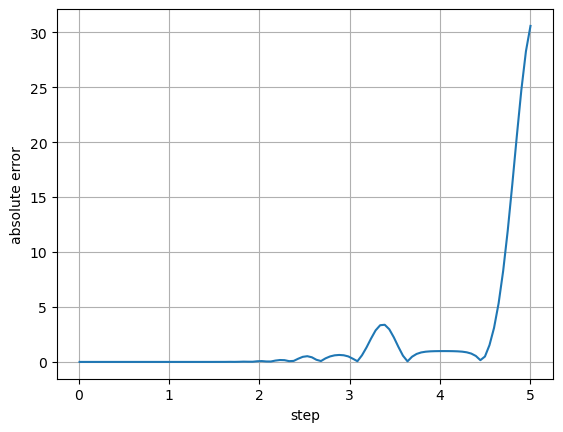

In [25]:
plt.plot(STEPS, Y)
plt.grid()
plt.xlabel("step")
plt.ylabel("absolute error")

### Results:
1. TT-CROSS works really fast comparing with default algorithm: 0.2 sec vs 1 min on the area 10^5 with the step 0.5. 
2. Due to previos statement TT-cross allows us to find integrals on large areas with high accuracy, however, we still have some bounds beacuse the operative memory of computers are not infinite, unfortunately. On the other hand, we can take lower step on too big areas and get the result.
3. Also as we can see on the last plot that the step could be not too small, but, in my view, it's true certainly for gaussian, due to its exponential growth. For any function probably it won't work.

So, as we can see TT-CROSS is significantly effective method especially for multidimension integrals on big areas. 